# AAG05

- Desenvolva em Python exemplo tão completo quanto o exemplo “Revisão”:

   1. Escolher/Criar uma amostra bivariada para o exemplo.
   2. Calcule o coeficiente de correlação e só vá para “3” caso a amostra bivariada tenha correlação forte (positiva ou negativa).
   3. Estimar parâmetros, verificar a qualidade, calcular os erros.
   4. Calcular desvio padrão dos erros e dos parâmetros.
   5. Calcular intervalo de confiança dos parâmetros para níveis de confiança de 90%, 95% e 99%.
   6. Testar linearidade, independência de erros, erros normais, homocedasticidade (com gráficos).

- Regras:

   1. Funções prontas de bibliotecas Python **DEVEM** ser usadas ao máximo possível.
   2. Código e resultados devem ser explicados em Markdown com comandos LaTeX.
   3. Os formatos de entrega devem ser **.pdf** e **.ipynb** (código fonte + markdowns).
   4. Os dados devem ser entregues em anexo.


## 1. Criar uma amostra bivariada

           x          y
0  10.000000  43.315865
1  12.105263  43.468579
2  14.210526  27.177576
3  16.315789  48.863530
4  18.421053  61.476518


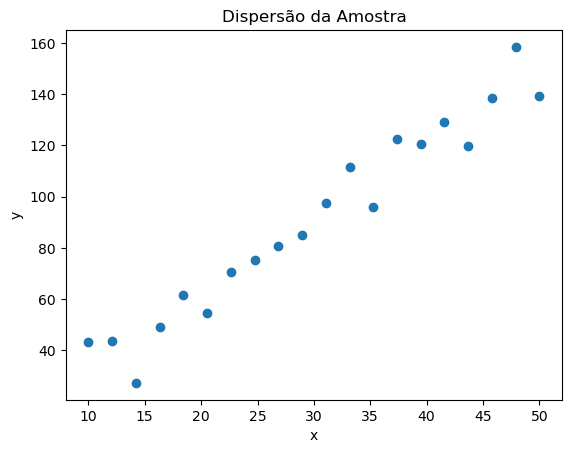

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Criar uma amostra bivariada com correlação forte
np.random.seed(10)  # Para reprodutibilidade
x = np.linspace(10, 50, 20)  # Variável independente
y = 3 * x + np.random.normal(0, 10, size=len(x))  # Variável dependente

# Organizar em um DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Visualizar a amostra
print(data.head())
plt.scatter(data['x'], data['y'])
plt.title("Dispersão da Amostra")
plt.xlabel("x")
plt.ylabel("y")
plt.show()


## 2. Calcular o Coeficiente de Correlação

In [21]:
from scipy.stats import pearsonr

# Calcular o coeficiente de correlação
correlation, _ = pearsonr(data['x'], data['y'])
print(f"Coeficiente de correlação: {correlation:.2f}")

# Verificar se é forte o suficiente
assert abs(correlation) > 0.7, "A correlação não é forte o suficiente!"


Coeficiente de correlação: 0.97


## 3. Estimar Parâmetros, Verificar Qualidade, Calcular Erros
Usando regressão linear para estimar os parâmetros.

Coeficiente (slope): 2.96
Intercepto: 2.41


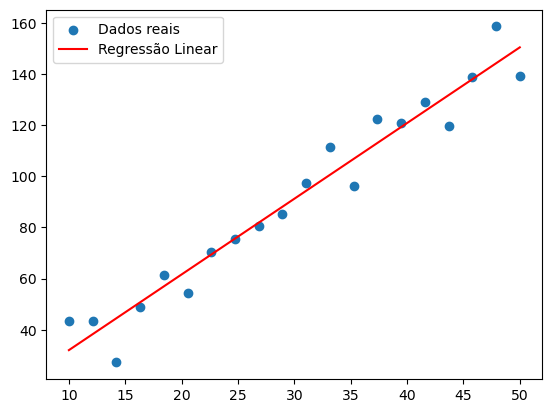

In [14]:
from sklearn.linear_model import LinearRegression

# Modelo de Regressão Linear
model = LinearRegression()
model.fit(data[['x']], data['y'])

# Parâmetros
coef = model.coef_[0]
intercept = model.intercept_
print(f"Coeficiente (slope): {coef:.2f}")
print(f"Intercepto: {intercept:.2f}")

# Previsões
data['y_pred'] = model.predict(data[['x']])

# Plot
plt.scatter(data['x'], data['y'], label="Dados reais")
plt.plot(data['x'], data['y_pred'], color='red', label="Regressão Linear")
plt.legend()
plt.show()


## 4. Calcular Desvio Padrão dos Erros e dos Parâmetros

In [15]:
# Calcular resíduos
data['residuals'] = data['y'] - data['y_pred']

# Variância e desvio padrão dos erros
sse = np.sum(data['residuals']**2)
mse = sse / (len(data) - 2)
std_error = np.sqrt(mse)
print(f"SSE: {sse:.2f}, MSE: {mse:.2f}, Desvio padrão: {std_error:.2f}")


SSE: 1391.34, MSE: 77.30, Desvio padrão: 8.79


## 5. Calcular Intervalo de Confiança

In [16]:
from scipy.stats import t

# Intervalo de confiança para o coeficiente
n = len(data)
t_critical = t.ppf(0.975, df=n-2)  # Para 95%
se_coef = std_error / np.sqrt(np.sum((data['x'] - np.mean(data['x']))**2))
ci_lower = coef - t_critical * se_coef
ci_upper = coef + t_critical * se_coef
print(f"Intervalo de confiança do coeficiente (95%): [{ci_lower:.2f}, {ci_upper:.2f}]")


Intervalo de confiança do coeficiente (95%): [2.62, 3.30]


## 6. Testar Pressupostos
Linearidade:

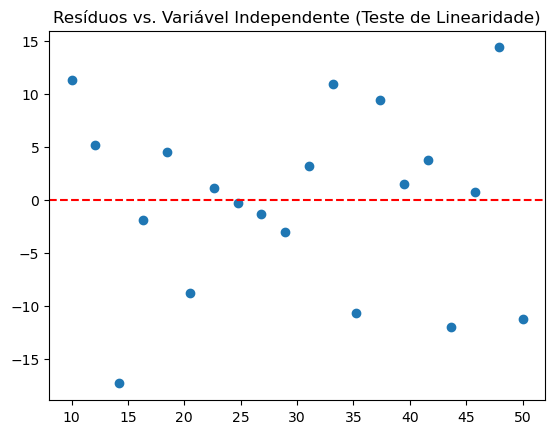

In [17]:
plt.scatter(data['x'], data['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.title("Resíduos vs. Variável Independente (Teste de Linearidade)")
plt.show()


Independência dos Erros:

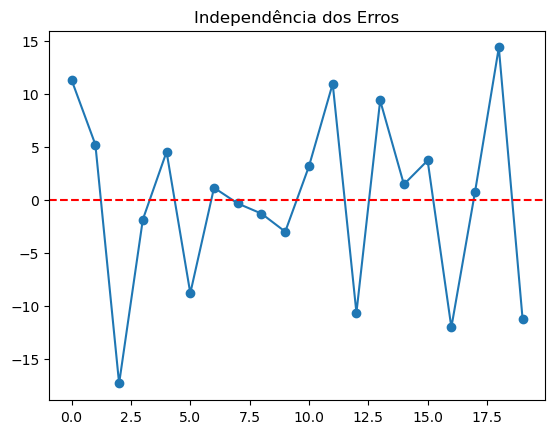

In [18]:
plt.plot(data['residuals'], marker='o')
plt.title("Independência dos Erros")
plt.axhline(0, color='red', linestyle='--')
plt.show()


Erros Normais:

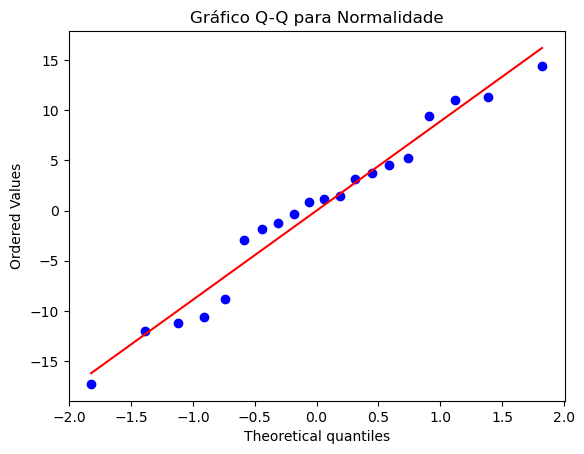

In [19]:
import scipy.stats as stats

stats.probplot(data['residuals'], dist="norm", plot=plt)
plt.title("Gráfico Q-Q para Normalidade")
plt.show()


Homocedasticidade:

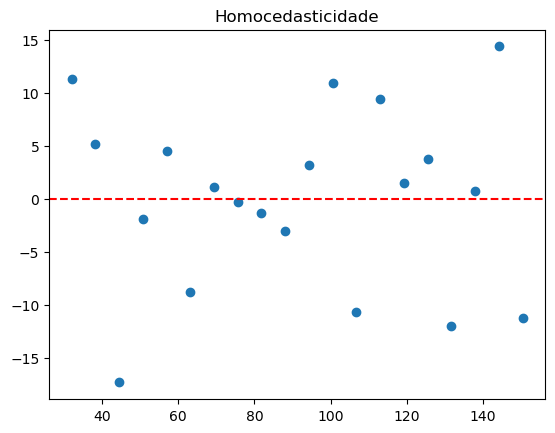

In [20]:
plt.scatter(data['y_pred'], data['residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.title("Homocedasticidade")
plt.show()
